# **IEEE SSCS “PICO” OPEN-SOURCE CHIPATHON 2023**
---





> **Group Members**

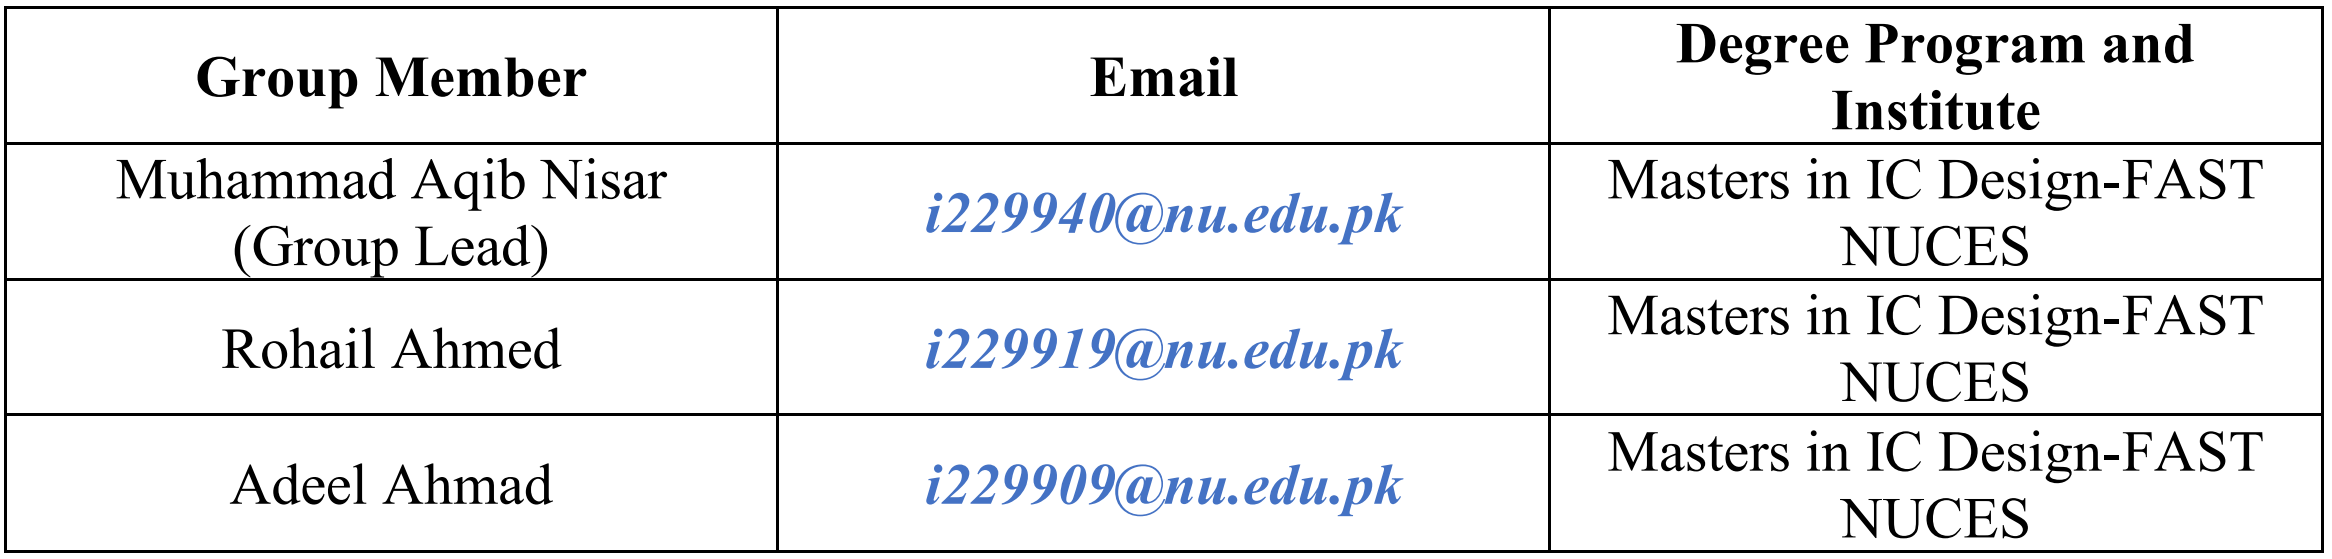

> **Supervisors**

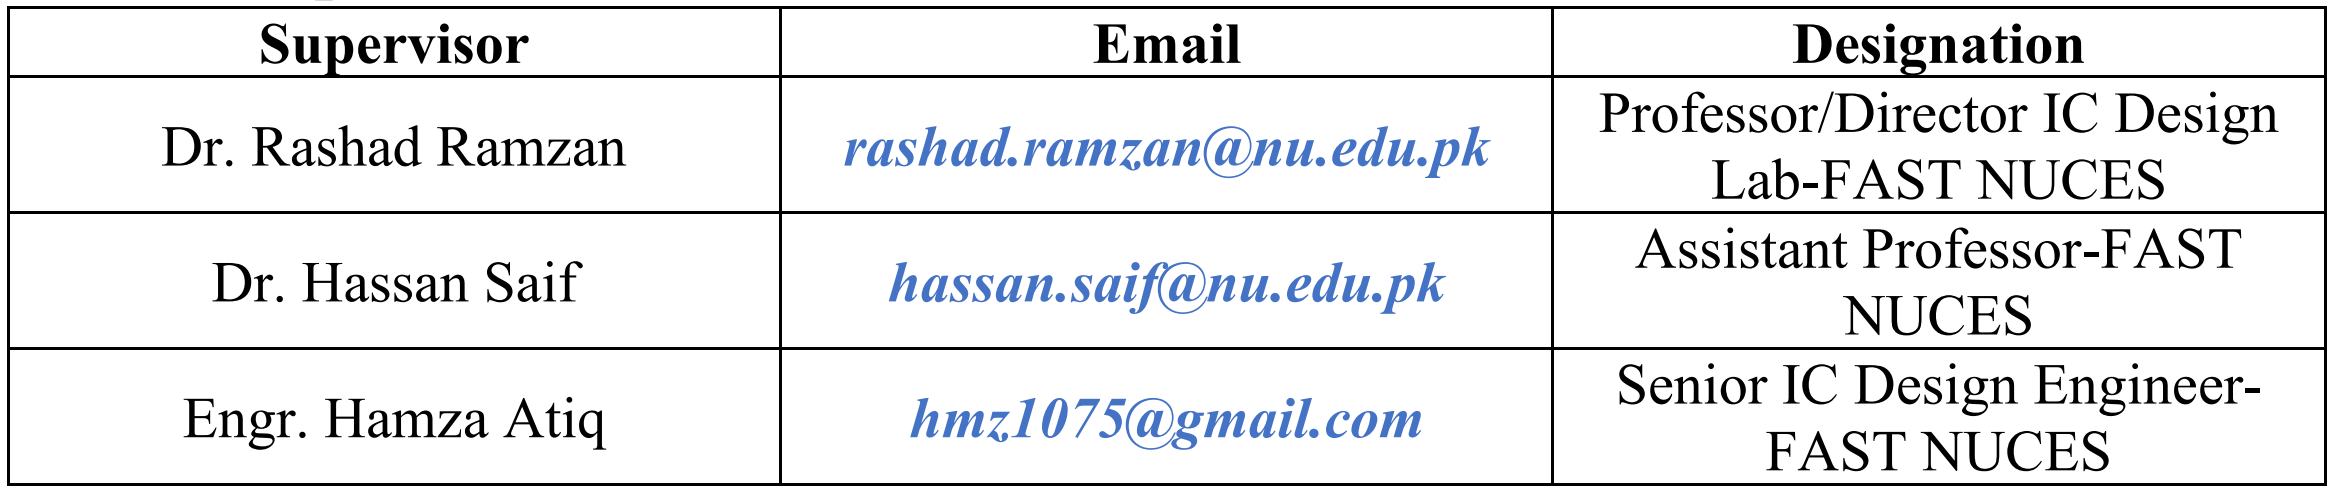



# **PROPOSAL FOR ANALOG-TO-DIGITAL CONVERTER (ADC BLOCK 4)**


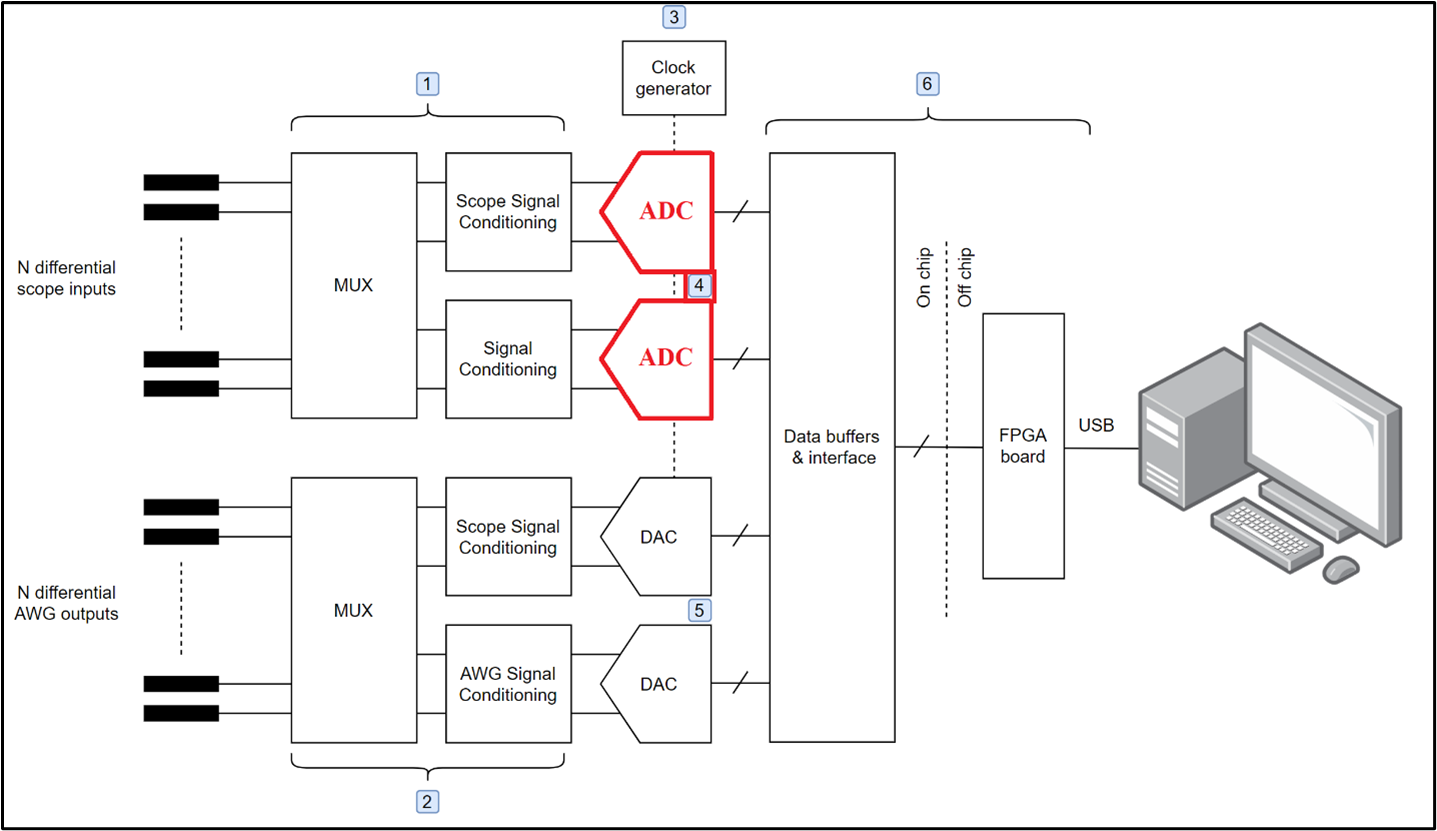
**Figure 1: SSCS PICO Chipathon 2023 Block Diagram**

## **Abstract**
In this proposal, a 12-Bit SAR ADC is proposed. For this proposal, 5-Bit SAR ADC is simulated and presented in this proposal along with the methodology for its extension into a 12-Bit SAR ADC for the “Lab Bench on a Chip”, achieving the sampling rate of 1.5 MS/s, Effective Number of Bits (ENOB) of over 9 and Signal-to-Noise Ratio (SNR) of 55dB while maintaining input capacitance of below 5pF. The SAR ADC uses Anderson Logic as its Digital Block since it the simplest to use as well as the ease of extendibility it provides. As for the DAC, binary weighted DAC is used in the simulation of 5-Bit SAR ADC, which is to be changed to C-2C DAC for the 12-Bit architecture. C-2C capacitor array can offer less capacitance at the input which is desirable to meet 5pF input capacitance requirement for the ADC. The design was simulated in 130nm PDK in Cadence Tools which is to be mapped onto the open-source tools XSCHEM, Magic. The fulfillment of targeted specifications will be made sure on the open-source tools as the next step of this project.

## **1.	Target Specifications**
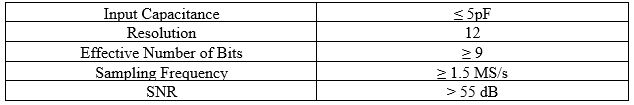

## **2.	Motivation**
Analog-to-Digital Converters (ADCs) are widely used in various equipments to convert analog signals (such as voltage, current, temperature, etc.) into digital signals that can be processed and analyzed by computers or other digital devices.
##### In laboratory equipment, ADCs are used in various instruments such as oscilloscopes, data acquisition systems, spectrum analyzers, multimeters, and many others. ADCs are crucial in these instruments because they allow accurate measurement and analysis of analog signals.
##### The ADC in an oscilloscope is responsible for converting the analog voltage waveform into a digital format that can be processed by the oscilloscope's software. The number of samples per second that the ADC takes is known as the sampling rate. The higher the sampling rate, the more accurately the oscilloscope can capture and display the voltage waveform.
##### The resolution of the ADC, which is the number of bits used to represent each sample, determines the accuracy of the digital representation of the voltage waveform. A higher bit resolution results in a more accurate representation of the voltage waveform.
##### In summary, ADCs are a crucial component of laboratory equipment as they enable the conversion of analog voltage waveforms into digital signals that can be processed and displayed on the monitor for analysis.

## **3.	ADC Topologies and Tradeoffs**
ADC topologies are the different circuit configurations used to convert analog signals into digital signals. Each topology has its own advantages and disadvantages, and choosing the right topology for a particular application requires an understanding of the trade-offs involved. 
### **3.1.	Successive Approximation Register (SAR) ADC** 
SAR ADCs offer good accuracy and low power consumption but have a limited sampling rate due to their sequential conversion process. SAR ADCs typically have a resolution in the range of 8-16 bits and a conversion time in the range of a few microseconds to a few hundred nanoseconds.
### **3.2.	Pipeline ADC**
Pipeline ADCs offer high sampling rates and moderate resolution. Pipeline ADCs typically have a resolution in the range of 10-16 bits and a conversion time in the range of a few hundred nanoseconds to a few tens of nanoseconds.
### **3.3.	Flash ADC**
Flash ADCs offer high sampling rates and low resolution. Flash ADCs typically have a resolution in the range of 6-12 bits and a conversion time in the range of a few tens of nanoseconds to a few nanoseconds.
### **3.4.	Sigma-Delta ADC**
Sigma-Delta ADCs offers high resolution and good noise performance but are relatively slow. Sigma-Delta ADCs typically has a resolution in the range of 16-24 bits and a conversion time in the range of a few microseconds to a few hundred nanoseconds.
### **3.5.	Comparison**
Considering the resolution and sampling requirements of the ADC in the “Lab Bench on a Chip”, SAR ADC seems to be the most appropriate choice as can be seen in the figure 2. It can provide sampling rate of 1.5 MSps while maintaining good resolution. Moreover, lesser area usage was one of the targets of the ADC in “Lab Bench on a Chip”. SAR ADC offers lesser power as well as area requirement than other architectures that can be utilized for achieving same performance parameters. Based on these facts, a SAR ADC is proposed in the following sections.

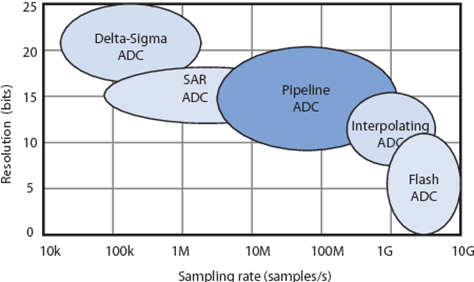

**Figure 2: Resolution vs Sampling Frequency of ADC Architectures [1]**


## **4.	Proposed ADC Methodology**
In this proposal the Successive Approximation Register (SAR) ADC is proposed, which can provide the desired SNR of greater than 55dB at targeted sampling rate of 1.5 MSps for real-time data acquisition in a low area and power budget. Figure. 2 presents the block diagram of the proposed architecture. It consists of a Digital to Analog Converter (DAC) with inherent Sample/Hold capacitor bank, which is area efficient since the requirement of a dedicated S/H capacitor bank can be avoided. DAC is followed up by comparator block which will be driving the SAR Logic block consisting of SAR Shift Register and SAR Digital Logic. In proposed design, Anderson logic is used as SAR Logic for the generation of digital code corresponding to the analog input. The reason for going with Anderson Logic is its straightforward design technique. This control logic encompasses a ring counter and a code register. The ring counter is a shift register. It is low power due to low signal transition. Furthermore, due to its iterative nature, it can be extended to high resolution by extending the shift registers.
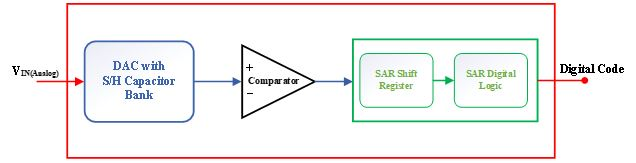


**Figure 3: ADC Building Blocks**

### **4.1.	Charge Redistribution SAR**
This architecture encompasses a capacitive DAC which also operates as a sample and hold. The block diagram of the charge redistribution SAR ADC is illustrated in Figure 4. The D/A converter usually contains a binary-weighted capacitor array. However, in order to minimize the use of large capacitors for area efficiency as well as limit input capacitance, C-2C capacitor array would be implemented. In each conversion, first the analog input is sampled and stored in the capacitor array and then the output of the DAC is compared to VCM for N clock cycle. The output of the DAC successively follows the VCM voltage at the comparator’s input and reaches VCM at the end of each conversion.


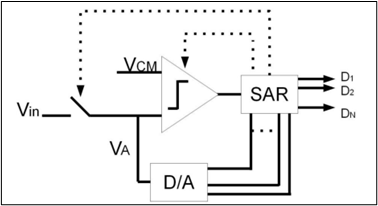

**Figure 4: Charge Redistribution SAR**

Keeping in mind the requirement of less area utilization for the ADC, C-2C capacitor array is opted for instead of a binary-weighted capacitor array [2] as shown in Figure 5. This greatly reduces the size of capacitor in the inherent S/H capacitor bank of DAC.


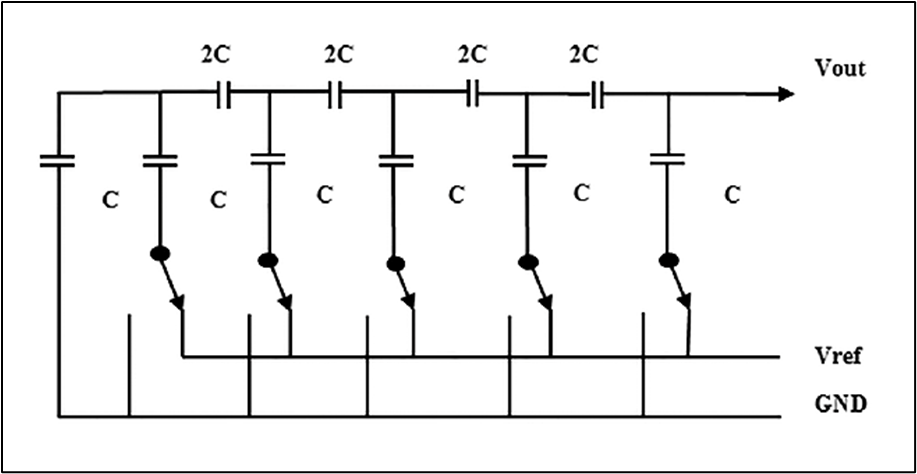

**Figure 5: C-2C Capacitor Array [2]**

A 5-bit binary-weighted DAC was simulated which will be further converted C-2C DAC. The schematic for this DAC is presented in Figure 6 whereas Figure 7 shows its respected transient response.

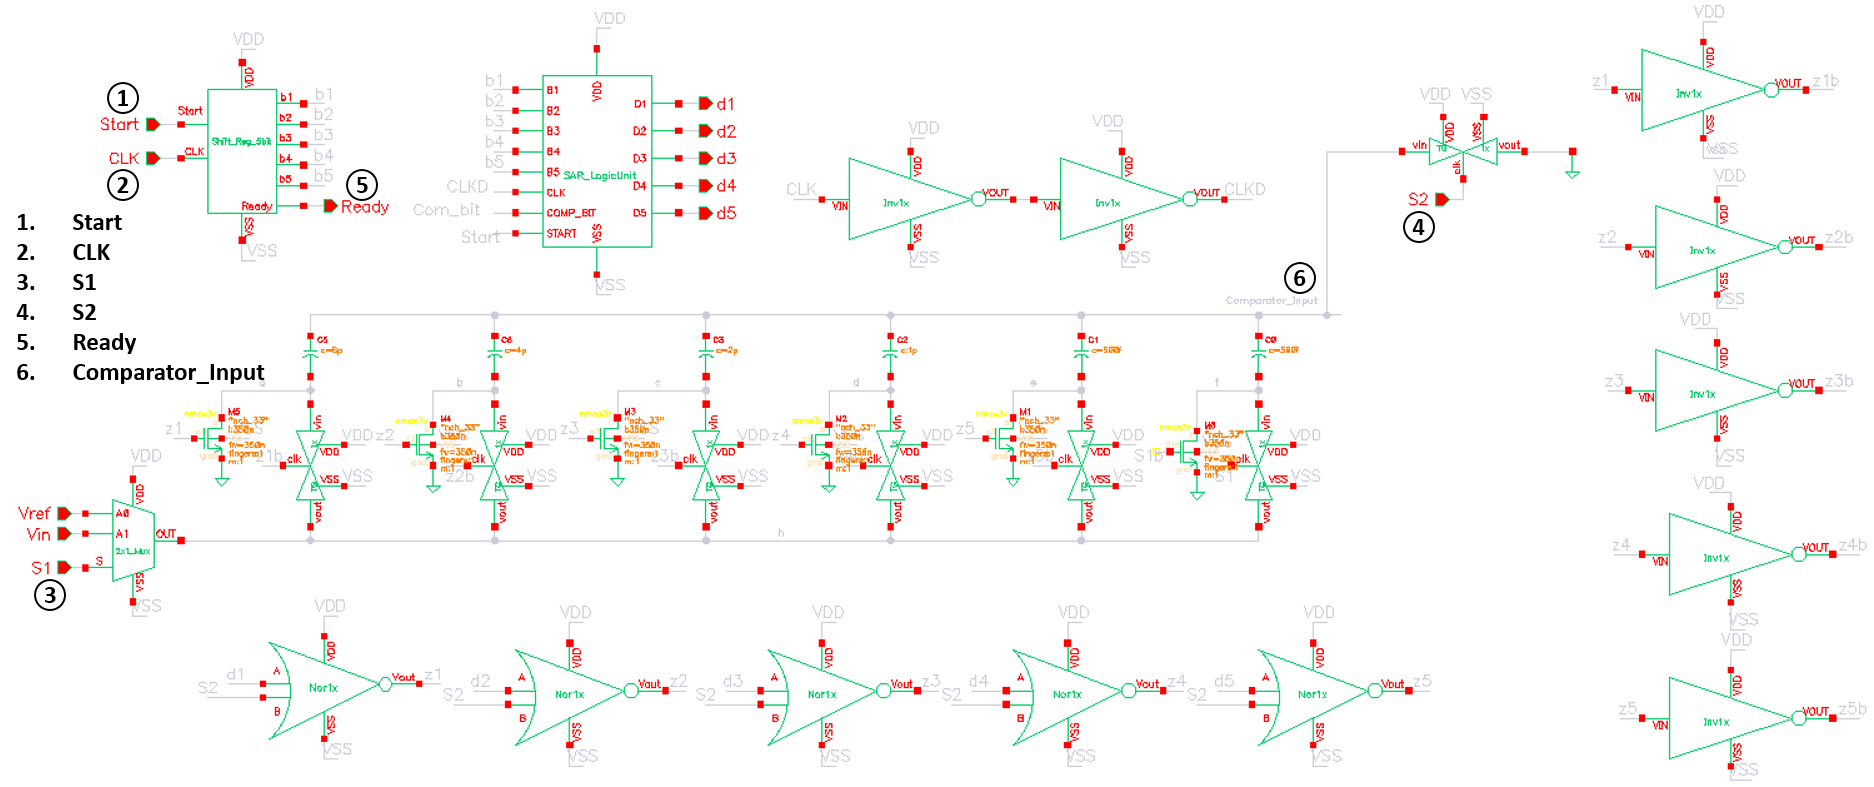

**Figure 6: Binary-Weighted Capacitor DAC for 5-Bits**

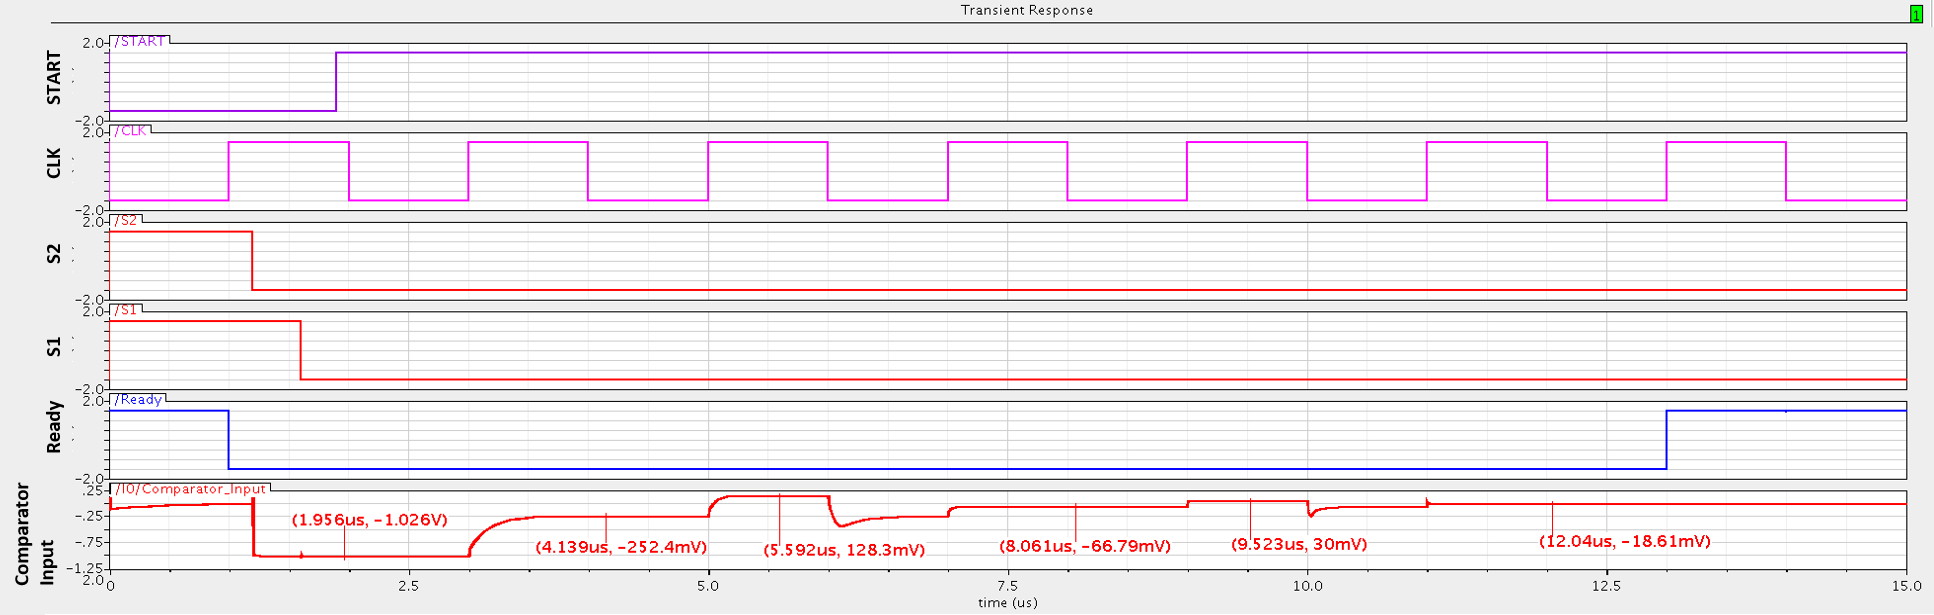

**Figure 7: DAC Transient Response**

### **4.2.	Comparator**
Comparator is one of the building blocks of A/D converters. In some sorts of ADCs such as flash ADC, the comparator has a great impact on the performance of the whole ADC. However, in some cases the error produced by the comparator can be compensated in the followed digital processing block. A comparator generates a logic output high or low based on the comparison of the analog input with a reference voltage. In an ideal comparator, with infinite gain, for input voltages higher than the reference voltage, the comparator outputs logical one and for the input voltages lower than the reference voltage it produces zero at the output.
##### Comparator is the only analog block of a SAR ADC and performs the actual conversion. It compares the analog sampled input to the analog output of the DAC and generates digital output of ‘0’ or ‘1’ which will be used in the SAR logic. Accuracy and speed of the comparator are two important factors. The comparator needs to resolve voltages with small differences. The offset voltage of the comparator employed in SAR ADC is translated to the transfer characteristic of the ADC thus will not affect the linearity of ADC.
##### Figure 8 and 9 present schematic and transient response of a latched-based comparator respectively.
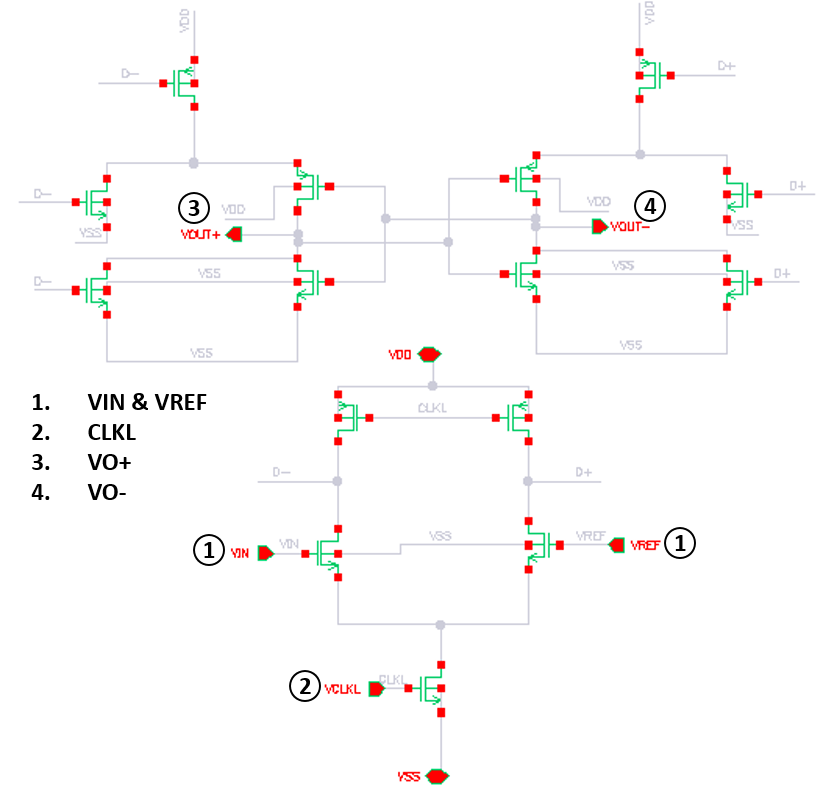

**Figure 8: Latched-Comparator Schematic [7]**

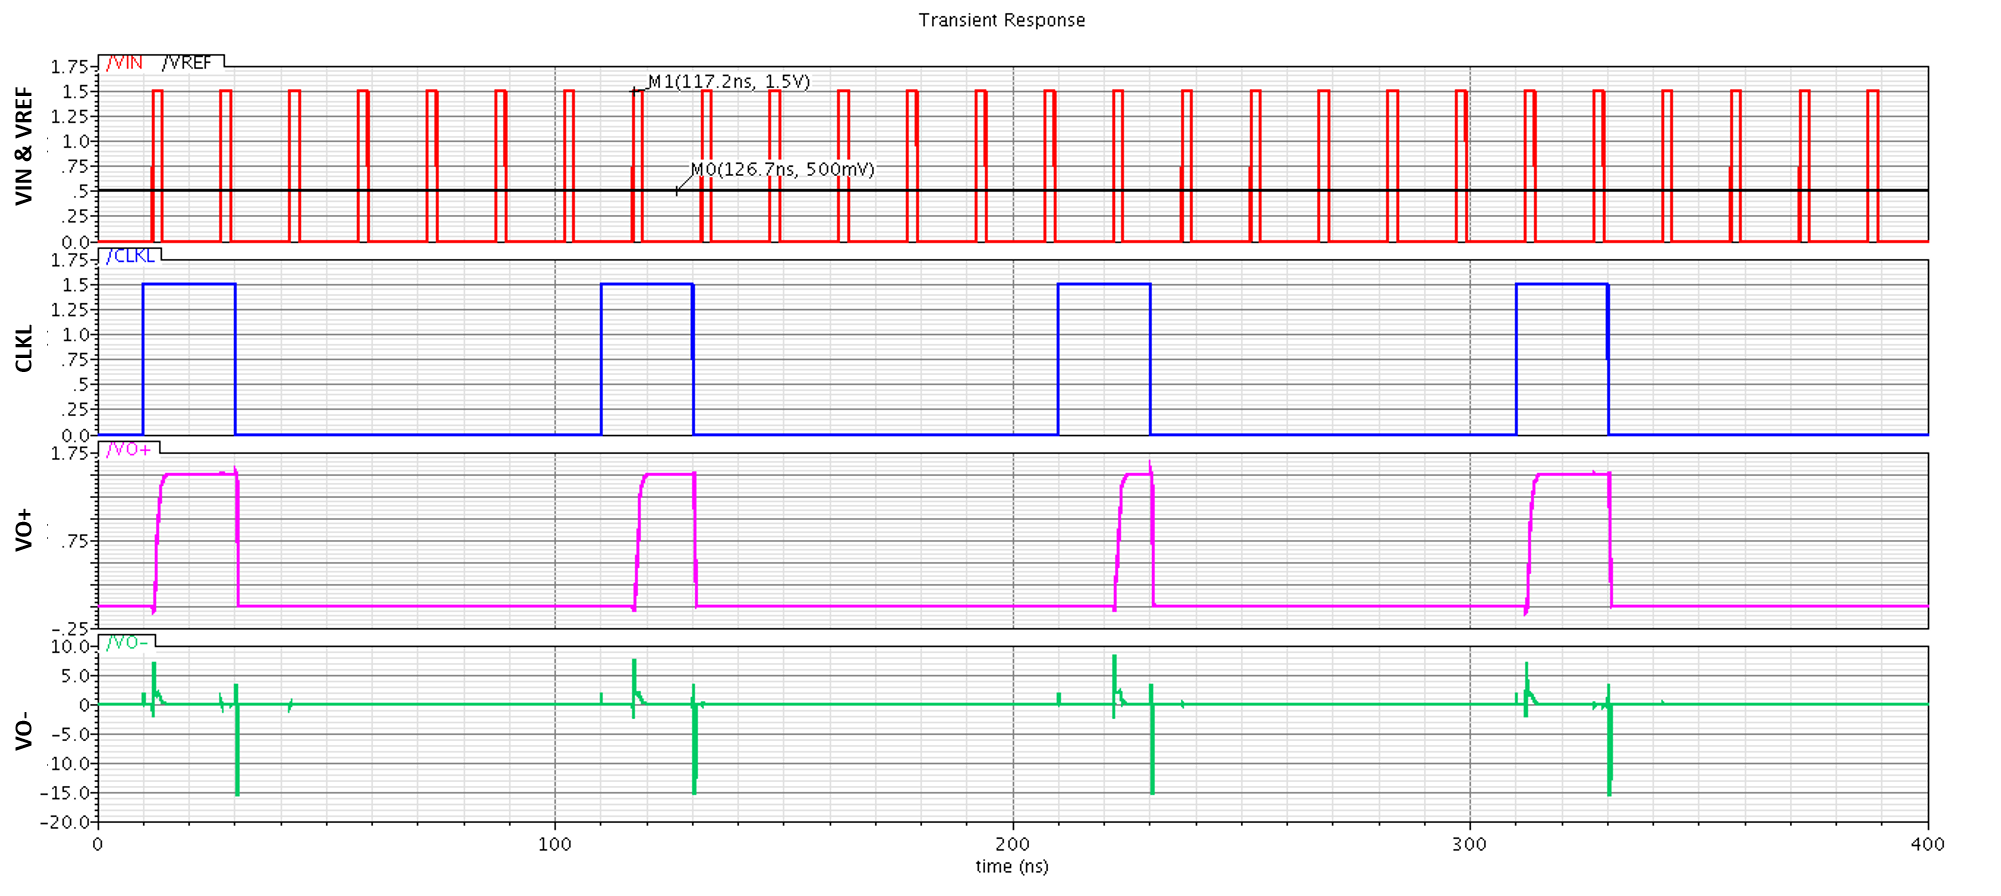

**Figure 9: Transient Response of a Latched Based Comparator**

#### **4.2.1.	Performance Metrics of Comparators**
Speed, accuracy, low power consumption and wide input common mode range are some design considerations for comparators, which define performance metrics of a comparator.

#### **4.2.1.1.	Resolution**
The minimum input voltage difference which is detectable by a comparator is called resolution. Noise and input referred offset are considered as limiting factors of the resolution. In an A/D converter the minimum required resolution is denoted as VLSB. For instance, in an N-bit ADC, the comparator should be able to detect one LSB which is V_LSB=1/2^N  .
#### **4.2.1.2.	Propagation Delay**
Propagation delay defines speed of the comparator, i.e. how fast the comparator decides. It also affects the ADC speed. As shown in Figure 9, rising propagation delay is measured between the transition points of the input and output signal when they reach 50% of the signal levels. According to the definition, propagation delay time is the average time of the rising and falling propagation delay times.
t_p=(t_pr+t_pf)/2


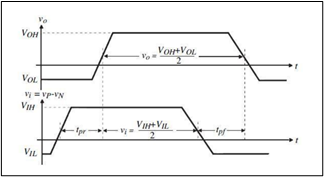

**Figure 10: Rising and falling propagation delays [3]**

#### **4.2.1.3.	Comparison Rate**
Comparison rate is the highest frequency in which a comparator results in a correct value and is defined by the overdrive recovery test. Assume the input difference of the comparator toggles from a large value to a small one, if the comparator responds correctly to this large voltage variation at its input, the comparator has recovered from an overdrive at this frequency. Comparison rate depends on the speed or basically on the recovery time of the regenerative latch and the preamplifier. [4]
#### **4.2.1.4.	Kickback Noise**
Kickback noise is in fact the voltage disturbance at the input nodes of the comparator due to large variation of the voltage at internal nodes. These switching effects of the latch are coupled to the input nodes via parasitic capacitances and vary the input voltage. This disturbance is known as kickback noise. There are some ways to reduce the impact of the kickback noise. The effect can be alleviated by employing a pre-amplifier before latch and also isolating the input nodes by using cascode transistors as switches.

### **4.3.	Successive Approximation Register (SAR) Logic**
Successive Approximation Register (SAR) control logic determines each bit successively. The SA register contains N bit for an N-bit ADC. There are 3 possibilities for each bit, it can be set to ‘1’, reset to ‘0’ or keeps its value. In the first step, MSB is set to ‘1’ and other bits are reset to ‘0’, the digital word is converted to the analog value through DAC. The analog signal at the output of the DAC is inserted to the input of the comparator and is compared to the sampled input. Based on the comparator result, the SAR controller defines the MSB value. If the input is higher than the output of the DAC, the MSB remains at ‘1’, otherwise it is reset to ‘0’. The rest of bits are determined in the same manner. In the last cycle, the converted digital word is stored. Therefore, an N-bit SAR ADC takes N+2 clock cycles to perform a conversion. 
### **4.3.1.	Anderson Logic**
The control logic presented in Figure 10 encompasses a ring counter and a code register [5]. The ring counter is in fact a shift register. For each conversion, in clock cycle 0, the RESET signal is high and all Flip Flops outputs are reset to zero, and for the rest of cycles RESET is low. In the next clock cycle, the most significant Flip Flop is set to one which corresponds to MSB of the digital word to the DAC. Then the counter shifts ‘1’ through the Flip Flops from MSB to LSB.


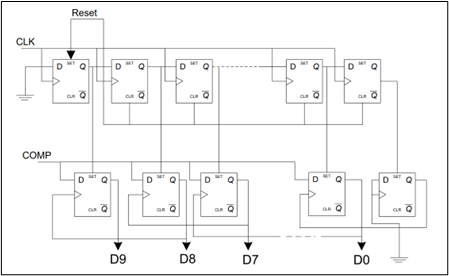

**Figure 11: Anderson SAR Logic [5]**

In each clock cycle, one of the outputs in the ring counter sets a Flip Flop in the code register. The output of this Flip Flop which is set by the ring counter is used as the clock signal for the previous Flip Flop. At rising edge of the clock, this Flip Flop loads the result from the comparator. At the end of each conversion, RESET signal turns to high. This type of SAR logic, converts each sample in N+2 clock cycles.The Flip Flops which are employed in this structure are set-reset D-FFs. For low power purpose, transmission gate-based Flip Flops are used as shown in Figure 11 [6].


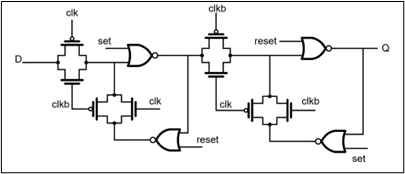

**Figure 12: Transmission Gate Based Flip-Flop**

The schematic along with the simulated results for a 5-bit Anderson Logic are presented in the figure 13 and figure 14 respectively.

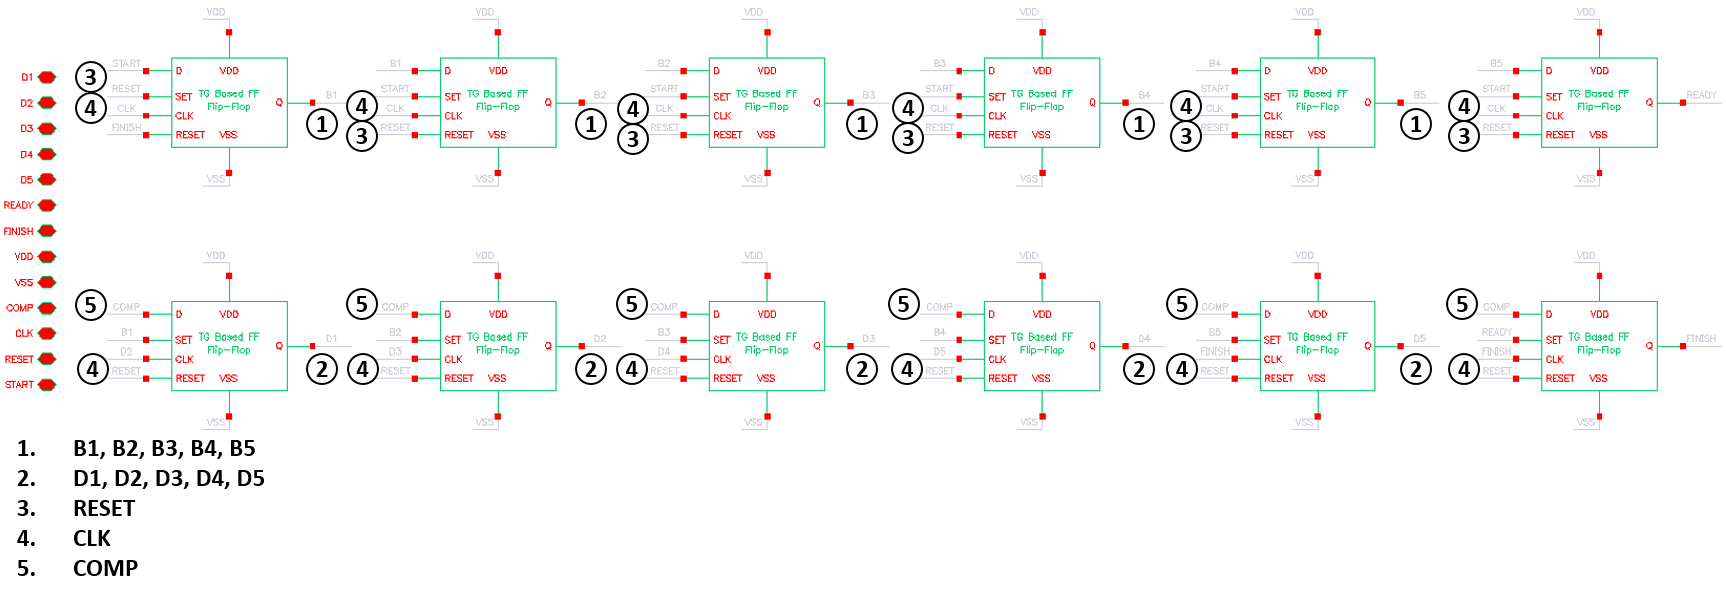

**Figure 13: SAR Anderson Logic**

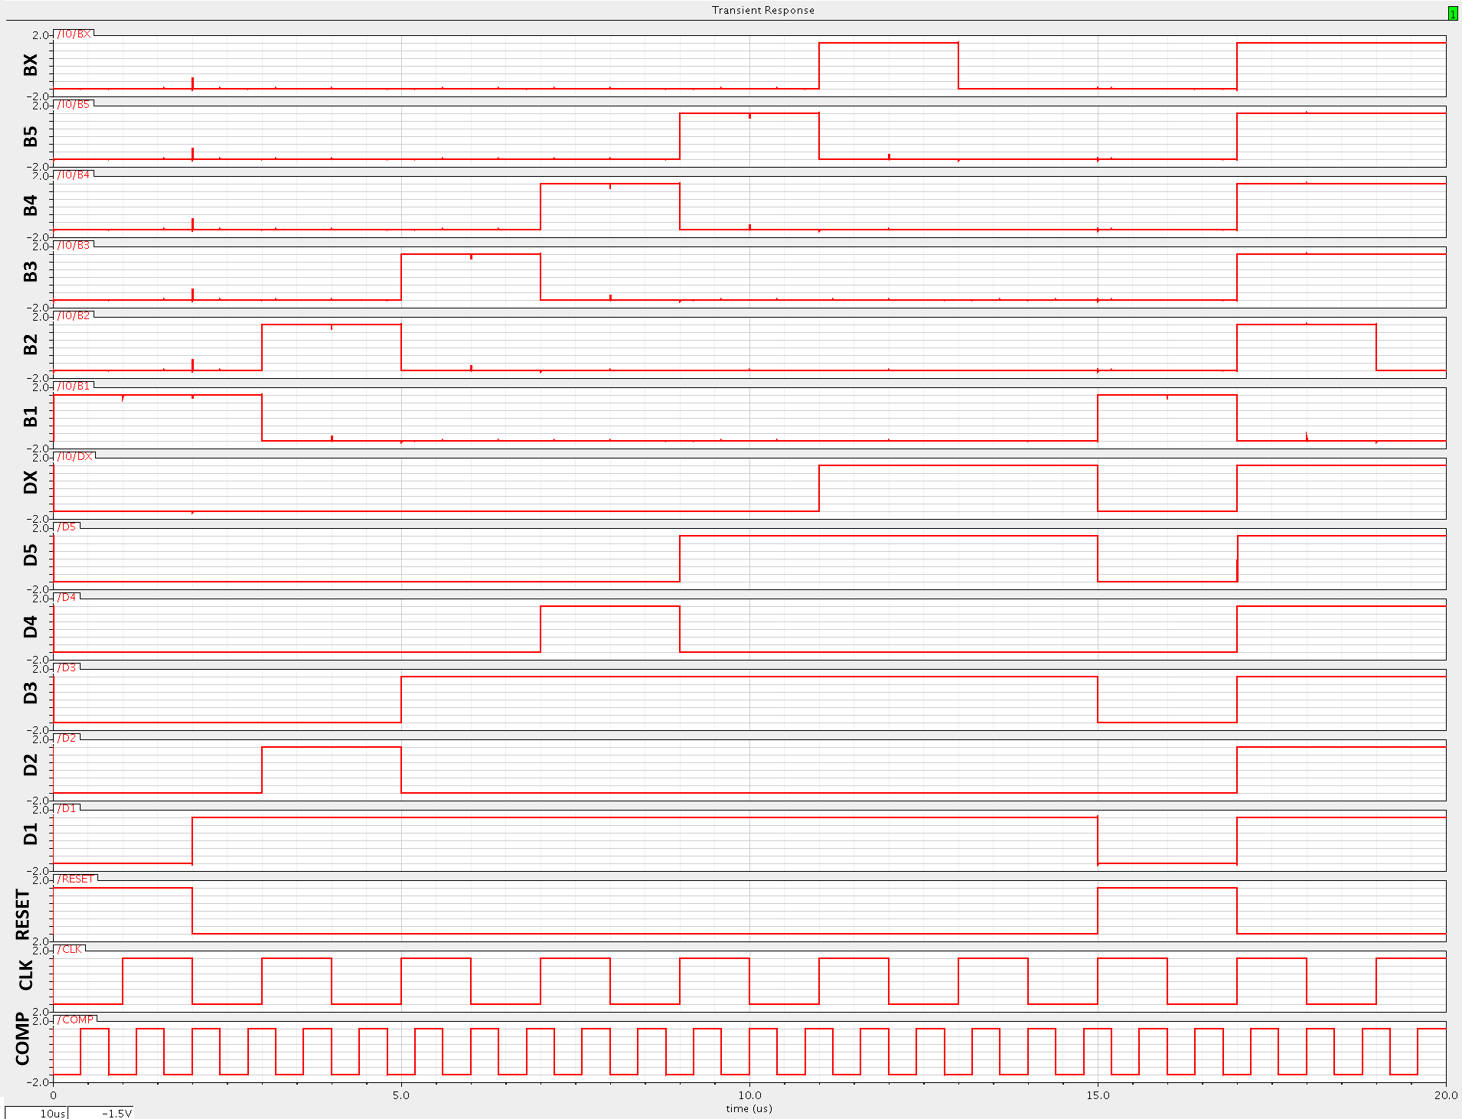


**Figure 14: SAR Anderson Logic Transient Response**



## **5.	Simulation of 5-Bit SAR ADC**
A 5-Bit SAR ADC was designed and simulated for the purpose of this proposal. This SAR ADC will be further extended to 12-Bit upon the acceptance of this proposal and further work will be done in order for its parameters to be improved. The techniques that will be used are expressed in the above sections in order to meet the requirement of ADC for the “Lab Bench on a Chip”. Figure 15 presents the 5-Bit SAR ADC schematic. The results of 5-Bit SAR ADC are shown in Figure 16. Here, the results presented are for input of 1V and reference voltage of 1.5V. The respective digital code should be ‘10101’ which it is, presented in the figure 15. The digital code d1-d5 is obtained after six clock cycles. The waveforms b1-b5 represent the shifting done by the SAR shift logic while ‘comparator_input’ is the output of DAC that is the input for the comparator in the SAR ADC.


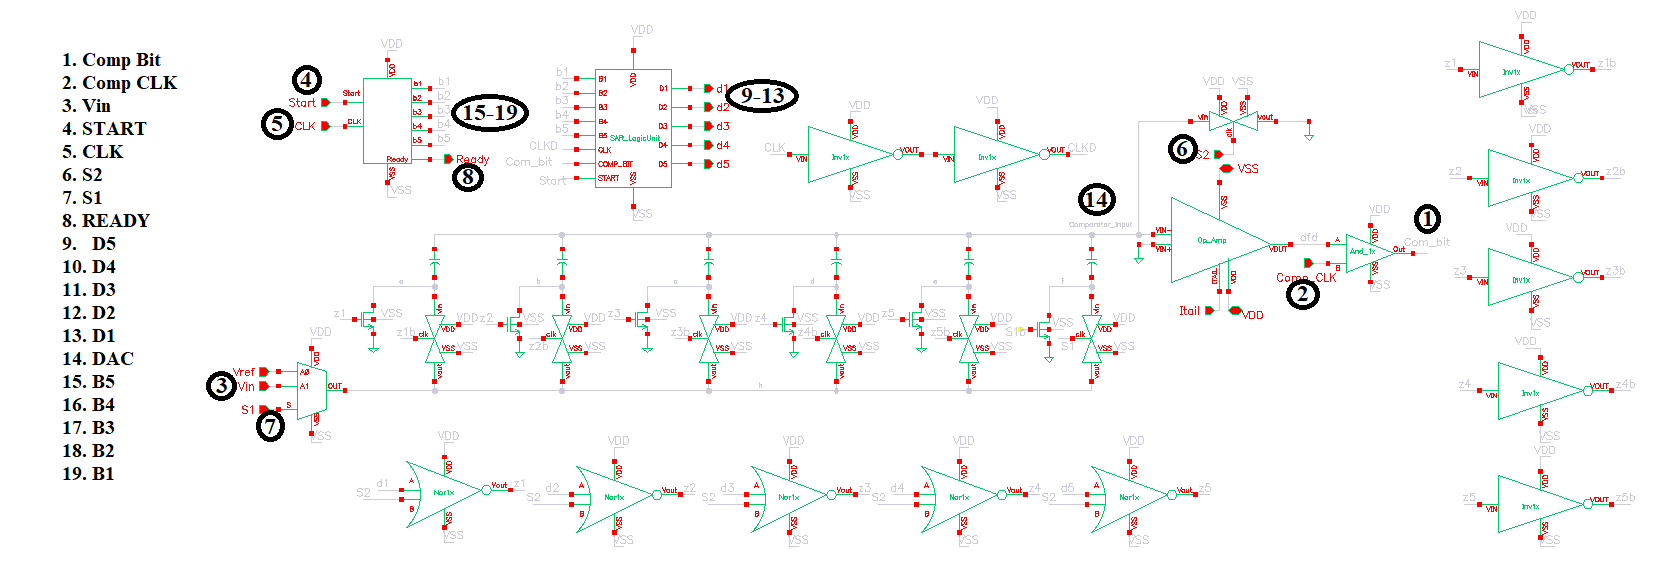

**Figure 15: 5-Bit SAR ADC Schematic**

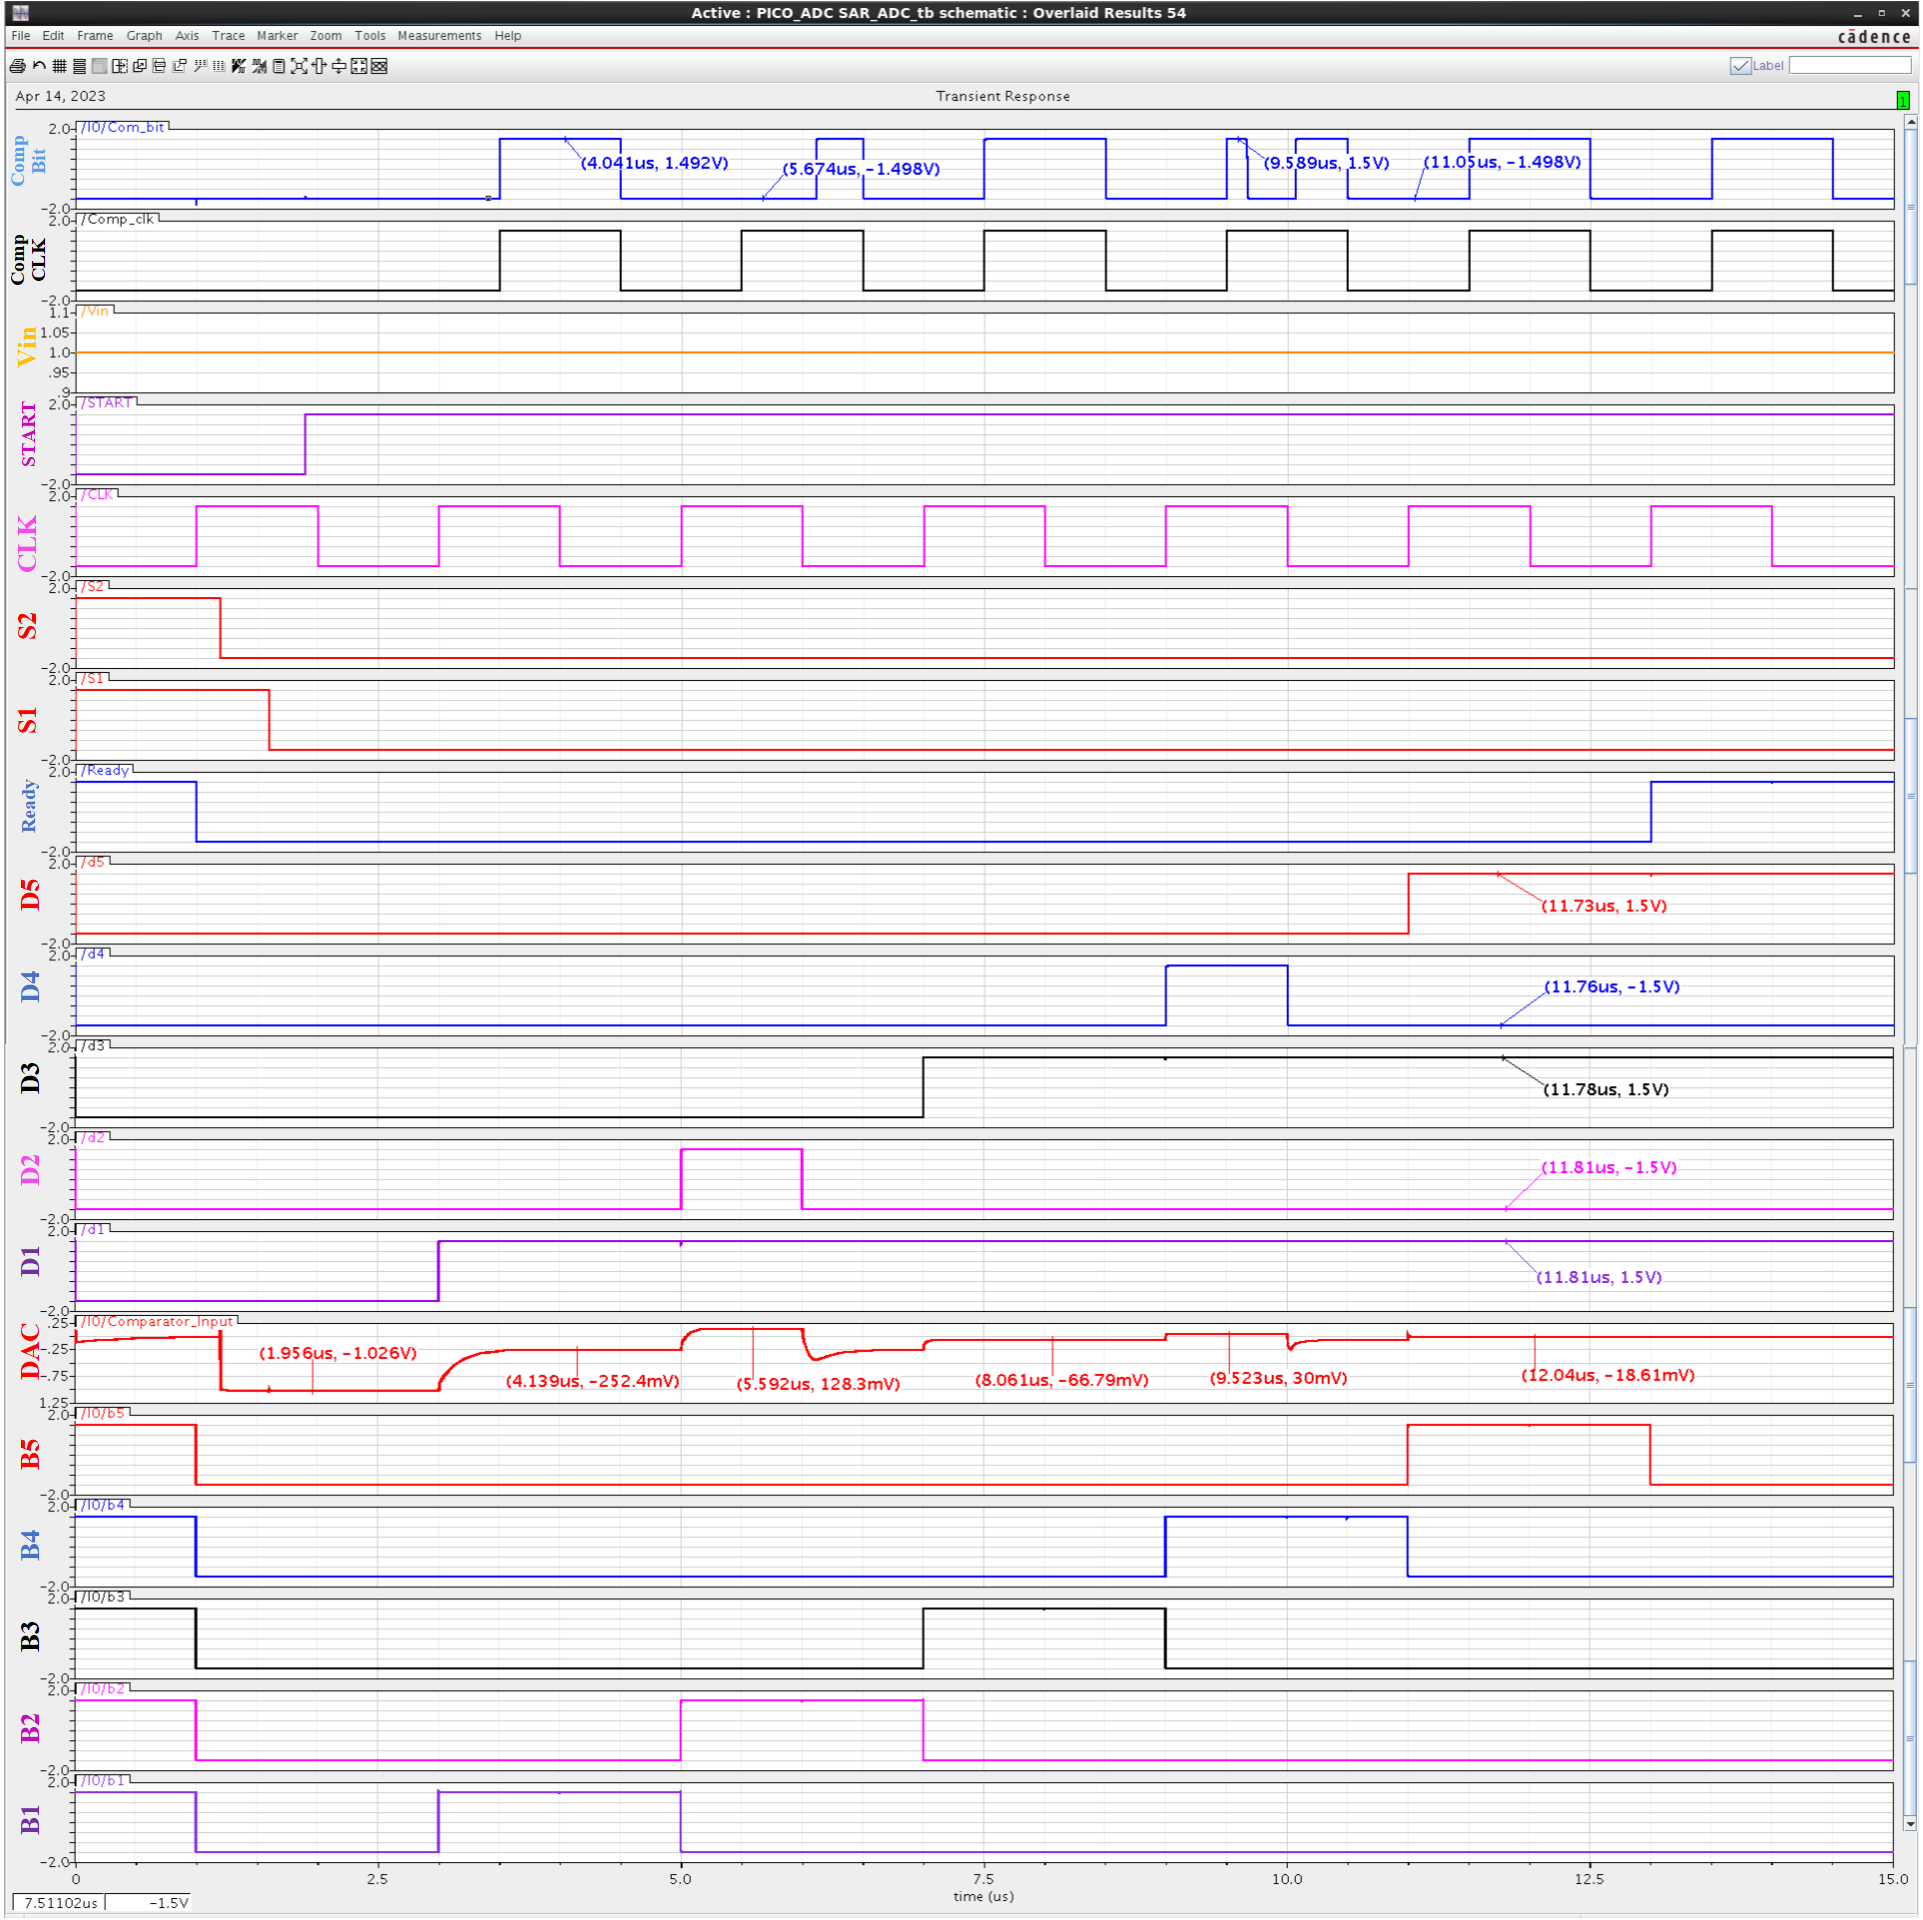

**Figure 16: 5-Bit SAR ADC Simulation Results**



## **6. XSCHEM Schematic**
The proposed design presented above will be implemented in open-source GF180nm PDK. So, for this purpose, we are starting to import our designs onto open-source. We started with simple comparator. The schematic was created for this purpose in XSCHEM as shown in Figure 17 and the respective results of comparator can be seen in Figure 18.

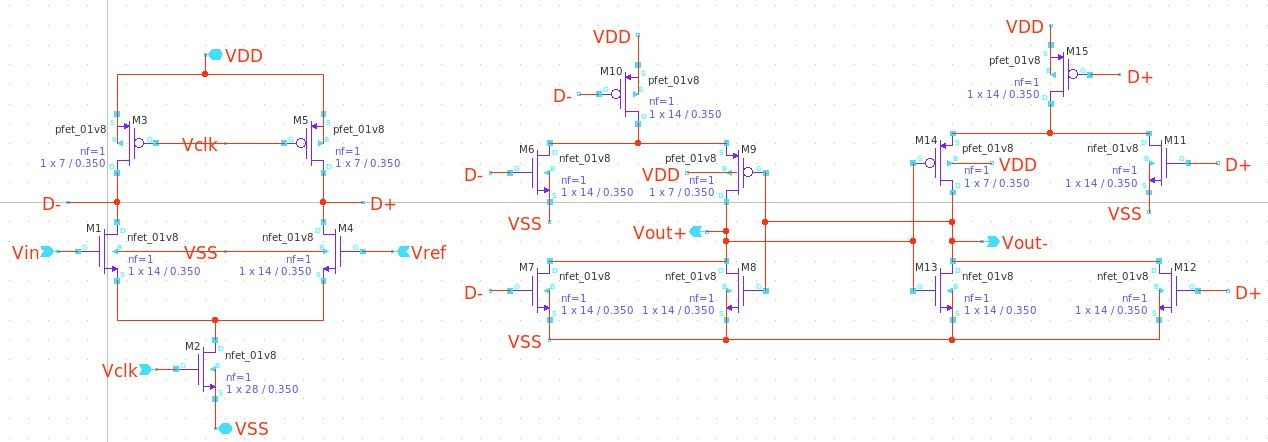

**Figure 17: Comparator Schematic in XSCHEM**

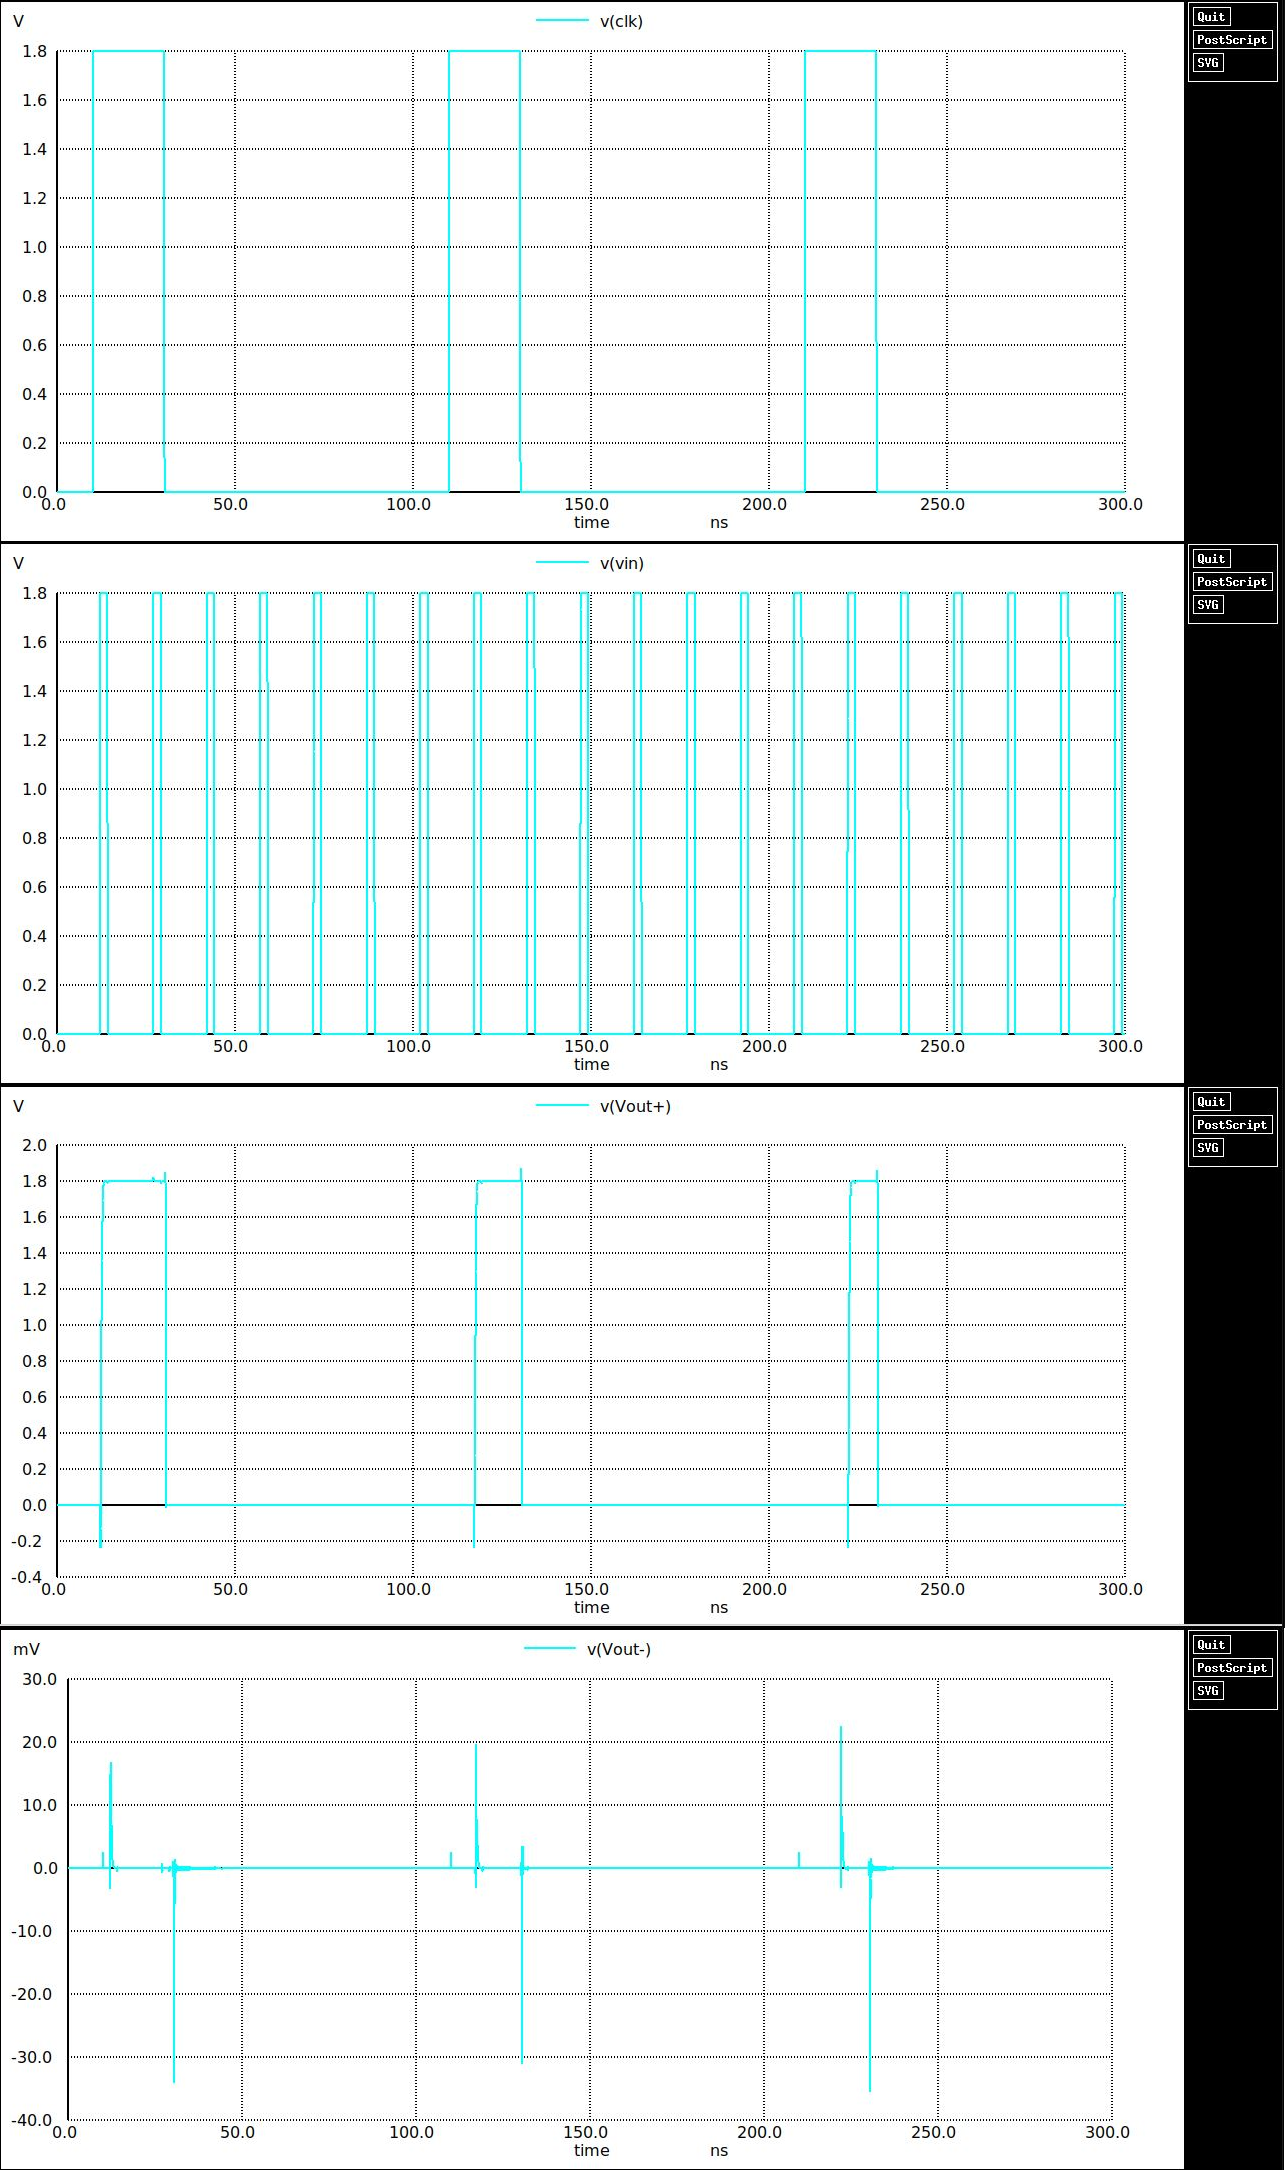

**Figure 18: Comparator Simulation Result in XSCHEM**

## **7. Conclusion**
The proposal is submitted with the simulation of 5-bit SAR ADC. This 5-bit SAR ADC will be extended into 12-Bit SAR ADC by the conversion of binary-weighted capacitor array DAC into C-2C capacitor arrays DAC, in order to obtain the functionality of 12-Bit DAC while having acceptable values of capacitors. Moreover, the SAR Digital Logic that is Anderson Logic is used since it the simplest to use and also since it can be easily extended to high resolution by extending the shift registers, one of the advantages of using Anderson Logic. In this way, 5-bit will be extended to 12-bit without having much alterations done to the architecture of ADC.


## **8.	References**
[1] Ponce-Hinestroza, Vicente Y. and Victor Rodolfo González-Díaz. “System-Level Behavioral Model of a 12-Bit 1.5-Bit Per Stage Pipelined ADC Based on Verilog®=-AMS.” *2018 15th International Conference on Synthesis, Modeling, Analysis and Simulation Methods and Applications to Circuit Design (SMACD) (2018)*: 301-304.
##### [2] A. Rodriguez-Perez, M. Delgado-Restituto, and F. Medeiro, “Power efficient ADCs for Biomedical Signal Acquisition,” *IMSE-CNM and University of Seville.*
##### [3] H.Khurramabadi ADC Converters (Lecture 21). UC Berkeley Course, *Analog-Digital Interfaces in VLSI Technology EE247*. 2006
##### [4] B. Razavi, *Principles of Data Conversion System Design*, Wiley-Interscience, IEEE Press, 1995
##### [5] T.O. Anderson, “Optimum Control Logic for Successive Approximation Analog-to-Digital Converters,” *Computer Design*, vol. 11, no. 7, pp. 81- 86, 1972.
##### [6] S. T. Oskuii, “Comparative Study on Low-Power High-Performance Flip-Flops,” Master thesis, Linkoping University, 2003.
##### [7] Hedayati, Raheleh. “A Study of Successive Approximation Registers and Implementation of an Ultra-Low Power 10-bit SAR ADC in 65nm CMOS Technology.” (2011).